#### Importing Libraries/Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

from feature_engine.creation import CyclicalTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv("C:/Users/Esrak/Desktop/CSE422 ANN/Rain Prediction/weatherAUS.csv")

#### Data Visualization and Exploration

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.tail() 

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [5]:
print (f"Dataset has: {df.shape[0]} ROWS, and {df.shape[1]} COLUMNS.")  ##
print (f"Total size of dataaframe ROW*COLUMNS: {df.size}")

Dataset has: 145460 ROWS, and 23 COLUMNS.
Total size of dataaframe ROW*COLUMNS: 3345580


In [6]:
print (df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
#method calculates some statistical measures like percentile, 
# mean and standard deviation of the numerical values of the Series or DataFrame
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Target Data count: 
 No     110316
Yes     31877
NaN      3267
Name: RainTomorrow, dtype: int64

Target Data count ratio %:  No     0.758394
Yes    0.219146
NaN    0.022460
Name: RainTomorrow, dtype: float64

Ploting Target variable:


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

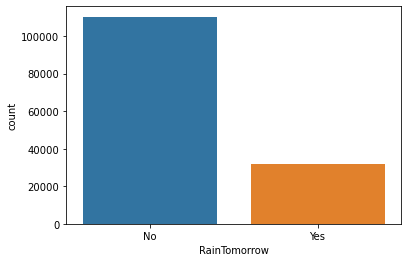

In [8]:
# Lets analyze Target column data first:
print ('Target Data count: \n',df["RainTomorrow"].value_counts(dropna=False))
print ('\nTarget Data count ratio %: ',df["RainTomorrow"].value_counts(dropna=False,normalize= True))
print ('\nPloting Target variable:')
sns.countplot(x= df["RainTomorrow"])

### Data Pre-processing and cleaning

In [9]:
# printing missing value nad missing % of each feature in dataset
x=df.isna().sum()
y = x* 100 / len(df)  ## Missing %
print ("Total Size of DF: ",df.shape)
pd.concat([x, y], axis=1).transpose()

Total Size of DF:  (145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.0,0.0,1485.000000,1261.000000,3261.000000,62790.000000,69835.000000,10326.000000,10263.000000,10566.000000,4228.000000,1767.000000,3062.000000,2654.000000,4507.000000,15065.000000,15028.000000,55888.000000,59358.000000,1767.000000,3609.000000,3261.000000,3267.000000
1,0.0,0.0,1.020899,0.866905,2.241853,43.166506,48.009762,7.098859,7.055548,7.263853,2.906641,1.214767,2.105046,1.824557,3.098446,10.356799,10.331363,38.421559,40.807095,1.214767,2.481094,2.241853,2.245978


In [10]:
perc = 40.0  #Lets drop features having missing value > 40%
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
df = df.dropna(axis=1, thresh=min_count)
df.shape

(145460, 20)

In [11]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,17.8,29.7,No,No


In [12]:
df1= df.fillna(df.mode().iloc[0])

In [13]:
df1.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

#### Parsing date fetaure into date/month/year

In [14]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['date'] = pd.DatetimeIndex(df1['Date']).day
df1['year'] = pd.DatetimeIndex(df1['Date']).year
df1['month'] = pd.DatetimeIndex(df1['Date']).month

In [15]:
df1.head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Temp9am,Temp3pm,RainToday,RainTomorrow,date,year,month
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,16.9,21.8,No,No,1,2008,12
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,17.2,24.3,No,No,2,2008,12
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,21.0,23.2,No,No,3,2008,12
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,18.1,26.5,No,No,4,2008,12
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,17.8,29.7,No,No,5,2008,12
5,2008-12-06,Albury,14.6,29.7,0.2,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,7.0,20.6,28.9,No,No,6,2008,12
6,2008-12-07,Albury,14.3,25.0,0.0,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,18.1,24.6,No,No,7,2008,12
7,2008-12-08,Albury,7.7,26.7,0.0,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,7.0,16.3,25.5,No,No,8,2008,12
8,2008-12-09,Albury,9.7,31.9,0.0,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,7.0,18.3,30.2,No,Yes,9,2008,12
9,2008-12-10,Albury,13.1,30.1,1.4,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,7.0,20.1,28.2,Yes,No,10,2008,12


In [53]:
print (df1.shape)
df1.head()

(145460, 19)


,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,16.9,21.8,0,0
1,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,17.2,24.3,0,0
2,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,21.0,23.2,0,0
3,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,18.1,26.5,0,0
4,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,17.8,29.7,0,0


In [17]:
## Droping 'Date,date,month and year' 
df1= df1.drop(columns=['Date','date','month','year'],axis=1)#.shape

In [18]:
df1.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [19]:
col_obj = df1.select_dtypes(include = 'object').columns

In [20]:
#print unique value in object features:
for feat in col_obj:
    print (f'{feat}: {df1[feat].nunique()}')

Location: 49
WindGustDir: 16
WindDir9am: 16
WindDir3pm: 16
RainToday: 2
RainTomorrow: 2


In [21]:
# using LabelEncoder to encode categorical features
le = LabelEncoder()
for col in col_obj:
    df1[col] = le.fit_transform(df1[col])

In [22]:
#Splitting dataset into X and  Y [ind. and dep. features]
X= df1.iloc[:,df1.columns!= 'RainTomorrow']
Y= df1['RainTomorrow']

#### scaling the dataset

In [51]:
## Here again we need to scaler the dataset:
sc = StandardScaler()
features = sc.fit_transform(X)
X1= pd.DataFrame(features, columns=X.columns) 
X1.head().style.background_gradient(cmap="Blues")

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Temp9am,Temp3pm,RainToday
0,-1.531666,0.191328,-0.041360,-0.203581,1.045228,0.327736,1.328766,1.366458,0.677819,0.623294,0.081409,-1.443652,-1.457215,-1.224564,0.995479,-0.014071,0.023104,-0.529795
1,-1.531666,-0.751052,0.268745,-0.275097,1.258262,0.327736,-0.221338,1.586813,-1.124341,0.394836,-1.318948,-1.297105,-1.026898,-1.119521,0.608406,0.032447,0.387799,-0.529795
2,-1.531666,0.112796,0.353318,-0.275097,1.471296,0.479465,1.328766,1.586813,0.565184,0.851751,-1.630138,-1.052860,-1.472054,-0.984466,0.608406,0.621667,0.227333,-0.529795
3,-1.531666,-0.468338,0.677518,-0.275097,-0.872075,-1.189550,0.442992,-1.718521,-0.335896,-1.090136,-1.267083,-1.736746,0.011799,-0.369217,0.608406,0.171999,0.708731,-0.529795
4,-1.531666,0.835287,1.283631,-0.155903,1.045228,0.100143,-1.328556,-0.176032,-0.786436,0.166379,0.651924,-0.906314,-0.997221,-1.389630,0.608406,0.125481,1.175541,-0.529795


#### Data Preparation

In [24]:
#Splitting into test and train
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.30, random_state=1)

In [25]:
print("Original Dataframe Shape: ", X_train.shape, y_train.shape)
# Identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

mask = yhat != -1 # select all rows that are not outliers
X_train, y_train = X_train.iloc[mask, :], y_train.iloc[mask]

# summarize the shape of the updated training dataset
print("Dataframe afer removing Outliers: ", X_train.shape, y_train.shape)

Original Dataframe Shape:  (101822, 18) (101822,)
Dataframe afer removing Outliers:  (101348, 18) (101348,)


In [49]:
X_train.corr().style.background_gradient(cmap="PuBuGn")

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Temp9am,Temp3pm,RainToday
Location,1.000000,-0.006757,-0.021492,-0.003614,-0.003344,0.078492,0.000385,0.008170,0.079414,0.070073,-0.000118,0.013631,0.031172,0.043810,0.006120,-0.016650,-0.021679,-0.002847
MinTemp,-0.006757,1.000000,0.733209,0.106044,-0.134551,0.169005,-0.029274,-0.157470,0.175690,0.171509,-0.237059,0.005931,-0.415940,-0.432997,-0.019538,0.897327,0.696781,0.055312
MaxTemp,-0.021492,0.733209,1.000000,-0.072553,-0.215068,0.068455,-0.212996,-0.183470,0.016978,0.049086,-0.502613,-0.501334,-0.302630,-0.397061,-0.231264,0.879337,0.968212,-0.225151
Rainfall,-0.003614,0.106044,-0.072553,1.000000,0.046099,0.126397,0.086302,0.048581,0.085839,0.057101,0.219013,0.250199,-0.160814,-0.121831,0.132341,0.013075,-0.076671,0.509638
WindGustDir,-0.003344,-0.134551,-0.215068,0.046099,1.000000,0.112076,0.356906,0.564819,0.006284,0.074880,0.071860,0.068333,-0.126010,-0.032095,0.061882,-0.176795,-0.226366,0.127058
WindGustSpeed,0.078492,0.169005,0.068455,0.126397,0.112076,1.000000,0.073758,0.136207,0.583411,0.663283,-0.207386,-0.031814,-0.426040,-0.389038,0.025857,0.146085,0.035494,0.144299
WindDir9am,0.000385,-0.029274,-0.212996,0.086302,0.356906,0.073758,1.000000,0.303639,0.114548,0.116186,0.079298,0.148981,-0.047715,0.041478,0.074697,-0.115730,-0.219939,0.165650
WindDir3pm,0.008170,-0.157470,-0.183470,0.048581,0.564819,0.136207,0.303639,1.000000,0.052559,0.089934,0.028397,-0.003394,-0.135439,-0.036669,0.056047,-0.174992,-0.195654,0.122877
WindSpeed9am,0.079414,0.175690,0.016978,0.085839,0.006284,0.583411,0.114548,0.052559,1.000000,0.515796,-0.267384,-0.032886,-0.210647,-0.167429,-0.039738,0.130489,0.008072,0.098985
WindSpeed3pm,0.070073,0.171509,0.049086,0.057101,0.074880,0.663283,0.116186,0.089934,0.515796,1.000000,-0.145346,0.017628,-0.269201,-0.241020,-0.003015,0.159816,0.027831,0.076943


In [27]:
corr_matrix = X_train.corr().abs()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))

In [28]:
dft= sol.reset_index()
dft.columns=['Feature 1','Feature 2','Correlation']

In [31]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((101348, 18), (101348,), (43638, 18), (43638,))

In [32]:
y_train.value_counts()

0    79022
1    22326
Name: RainTomorrow, dtype: int64

### Model Building

In [36]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=18))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               2432      
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 19,073
Trainable params: 19,073
Non-trainable params: 0
_________________________________________________________________


In [38]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=100)

Epoch 1/20
1014/1014 [==============================] - 6s 6ms/step - loss: 0.3142 - accuracy: 0.8656 - val_loss: 0.3496 - val_accuracy: 0.8485
Epoch 2/20
1014/1014 [==============================] - 1s 1ms/step - loss: 0.3124 - accuracy: 0.8670 - val_loss: 0.3474 - val_accuracy: 0.8520
Epoch 3/20
1014/1014 [==============================] - 1s 1ms/step - loss: 0.3114 - accuracy: 0.8676 - val_loss: 0.3474 - val_accuracy: 0.8508
Epoch 4/20
1014/1014 [==============================] - 1s 1ms/step - loss: 0.3100 - accuracy: 0.8680 - val_loss: 0.3491 - val_accuracy: 0.8523
Epoch 5/20
1014/1014 [==============================] - 1s 1ms/step - loss: 0.3088 - accuracy: 0.8694 - val_loss: 0.3502 - val_accuracy: 0.8482
Epoch 6/20
1014/1014 [==============================] - 1s 1ms/step - loss: 0.3072 - accuracy: 0.8691 - val_loss: 0.3488 - val_accuracy: 0.8496
Epoch 7/20
1014/1014 [==============================] - 1s 1ms/step - loss: 0.3058 - accuracy: 0.8691 - val_loss: 0.3526 - val_accuracy:

In [39]:
print (y_test.value_counts())
print (y_train.value_counts())
X_train.shape, y_train.shape, X_test.shape, y_test.shape

0    34215
1     9423
Name: RainTomorrow, dtype: int64
0    79022
1    22326
Name: RainTomorrow, dtype: int64


((101348, 18), (101348,), (43638, 18), (43638,))

[]

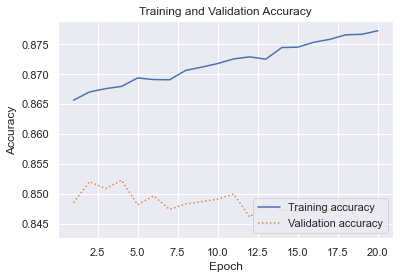

In [40]:
sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

###  Performance Evaluation

1364/1364 [==============================] - 1s 503us/step


Text(89.18, 0.5, 'Actual label')

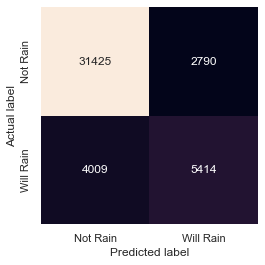

In [45]:
y_predicted = model.predict(X_test) > 0.5   ## will rain if prob > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['Not Rain','Will Rain']
sns.heatmap(mat, square=True, annot=True, fmt='d',cbar=False,xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

1364/1364 [==============================] - 1s 481us/step


Text(89.18, 0.5, 'Actual label')

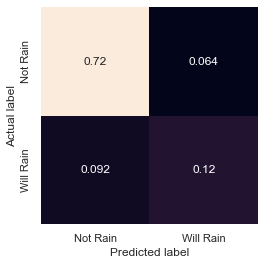

In [44]:
y_predicted = model.predict(X_test) > 0.5   ## will rain if prob > 0.5
mat = confusion_matrix(y_test, y_predicted,normalize='all')
labels = ['Not Rain','Will Rain']
sns.heatmap(mat, square=True, annot=True, cbar=False,xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

Classification Report

In [43]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90     34215
           1       0.66      0.57      0.61      9423

    accuracy                           0.84     43638
   macro avg       0.77      0.75      0.76     43638
weighted avg       0.84      0.84      0.84     43638

